### For climatology OISST monthly and seasonally

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
# %matplotlib notebook
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
import cartopy as cp
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import warnings
warnings.filterwarnings('ignore')

from lo_tools import Lfun
Ldir = Lfun.Lstart()

In [5]:
# temp_cmap = cmocean.cm.curl
temp_cmap = 'RdYlBu_r'

### Load and Know data using xarray

In [6]:
# input location
type = 'climatology'
folder = 'monthly'
# in_dir = Ldir['LOo'] / type / 'OISST2.1'
in_dir = Ldir['data'] / type / 'OISST2.1'
# output location

out_dir = Ldir['LOo'] / 'plots'/ 'stressor'/ 'MHW' / 'OISST'
Lfun.make_dir(out_dir, clean=False)

# Define extracted daily (mean) file paths 
infile = in_dir/'sst.mon.ltm.1991-2020.nc'
# Open the NetCDF file using xarray
ds = xr.open_dataset(infile)

In [7]:
ds

<xarray.Dataset> Size: 100MB
Dimensions:             (lat: 720, lon: 1440, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                 (lon) float32 6kB 0.125 0.375 0.625 ... 359.6 359.9
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    sst                 (time, lat, lon) float32 50MB ...
    valid_yr_count      (time, lat, lon) float32 50MB ...
Attributes:
    Conventions:                    CF-1.5
    title:                          NOAA/NCEI 1/4 Degree Daily Optimum Interp...
    institution:                    NOAA/National Centers for Environmental I...
    source:                         NOAA/NCEI https://www.ncei.noaa.gov/data/...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    dataset_title:                  NOAA Daily Optimum Interpolation Sea Surf...
    version:                        Version 2.1
    comment:                        Reynolds, et al.(2007) Daily High-Resolut...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

In [8]:
sst_surf = ds['sst']

# refer to https://zenodo.org/records/5944708

https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html
https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html

### Goal: create a loop to plot one parameter (e.g. surface_temp) in 12 months

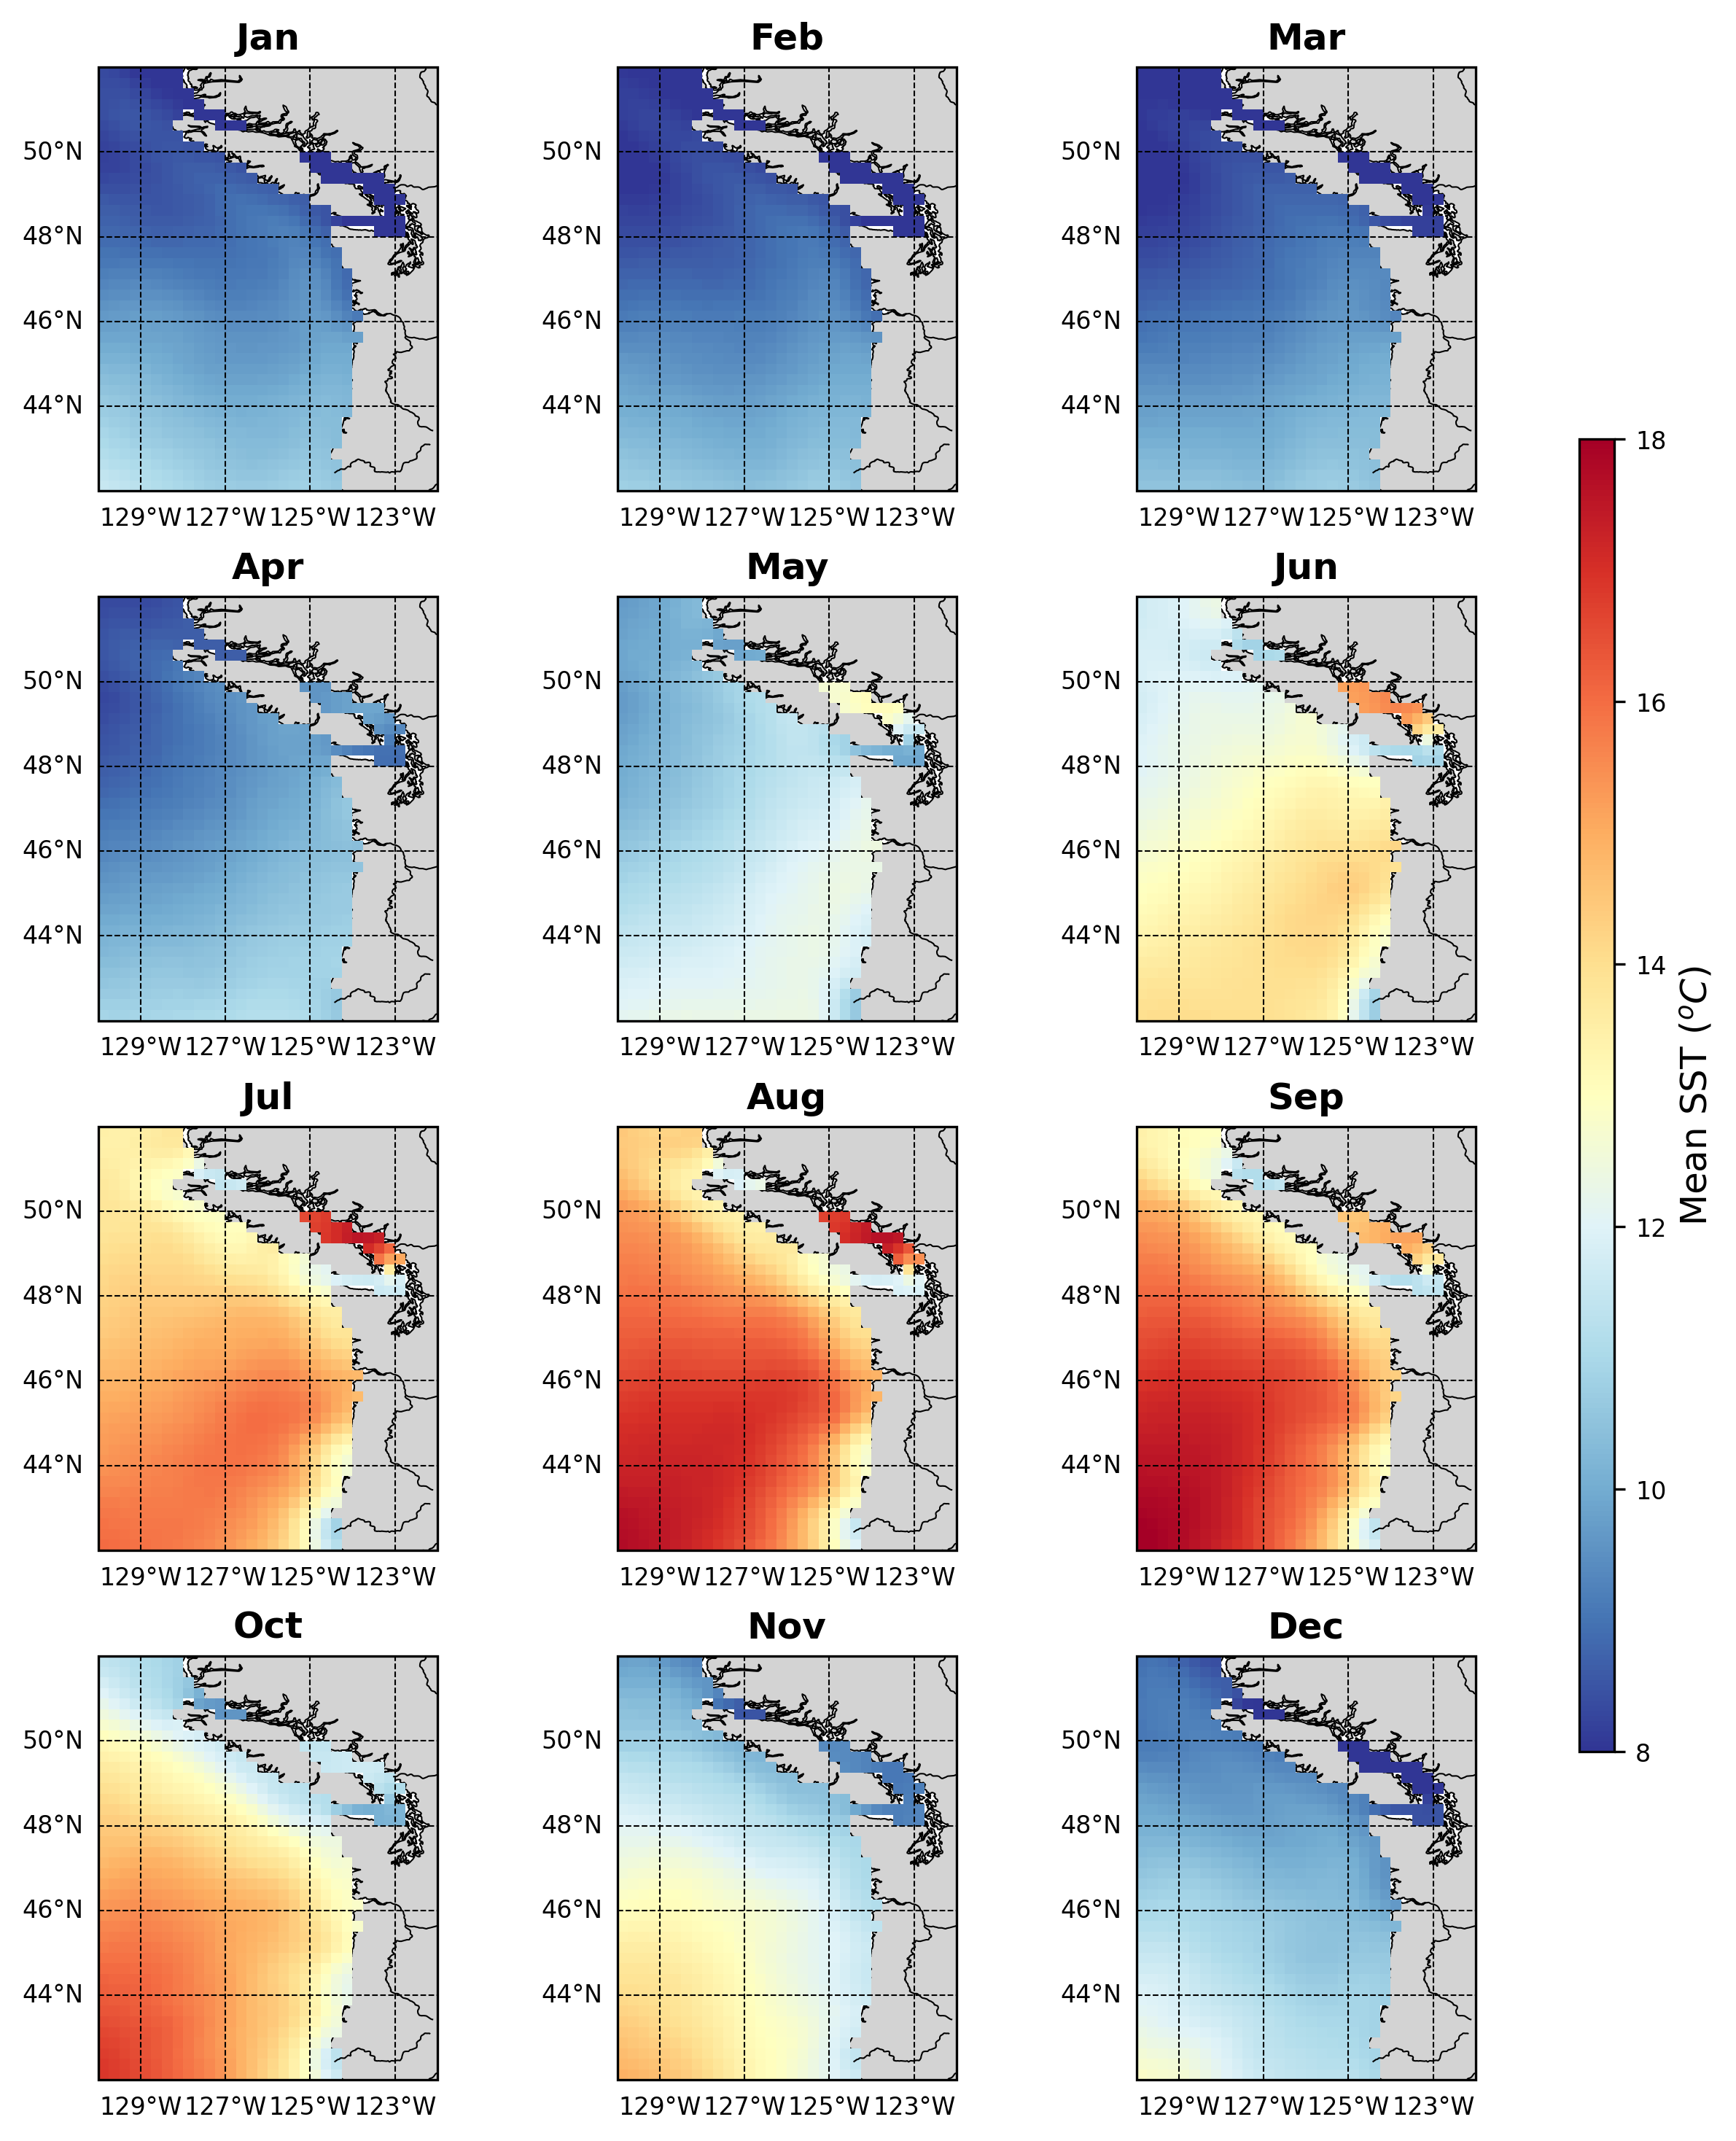

In [11]:
## Zoom into Liveocean domain
fig = plt.figure(figsize = (8,10), dpi = 300)

nrows, ncols = 4, 3

extent = [-130, -122, 42, 52]

central_lon = np.mean(extent[:2])

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Create a list to store the plots
plots = []
for n in range(1, 13):
    # ax = plt.subplot(nrows, ncols, n, projection = ccrs.PlateCarree(central_longitude = central_lon))

    ax = fig.add_subplot(nrows, ncols, n, projection = ccrs.PlateCarree
    (central_longitude = central_lon))
    ax.set_extent(extent)
    ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey',edgecolor = 'black',linewidth=0.5)
    ax.add_feature(cp.feature.RIVERS, facecolor = 'None',edgecolor = 'black',linewidth=0.5)
    gl = ax.gridlines(draw_labels=True,linewidth=0.5, color='k',linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator([-129, -127, -125, -123])
    gl.ylocator = mticker.FixedLocator([42, 44, 46, 48, 50, 52])
    plot = sst_surf.isel(time = n-1).plot(ax=ax, x="lon", y="lat", cmap= temp_cmap, vmin=8, vmax=18,transform=ccrs.PlateCarree())
    ax.set_title(month_list[n-1], size=12, weight='bold' )
    cax = plot.get_figure().get_axes()[n]
    cax.remove()
    # Add a colorbar to the third subplot in each row
    # Append each plot to the list
    plots.append(plot)   

# set the spacing between subplots
plt.subplots_adjust(left=0.01,
                    bottom=0.05,
                    right=0.90,
                    top=0.97,
                    wspace=0,
                    hspace=0.25)

# Create a subplot for the colorbar
cbar_ax = fig.add_axes([0.90, 0.2, 0.02, 0.6])  # [x, y, width, height]
# Create a single colorbar for all plots
cbar = fig.colorbar(plots[0], cax=cbar_ax, orientation='vertical')
cbar.set_label('Mean SST ($^{o}C$)', size =12)
cbar.set_ticks(np.arange(8,18.01,2))

plt.show()
fig.savefig(out_dir/f'plot_OISST_climatology_monthly_nCCS.png', dpi = 300)


## global scale

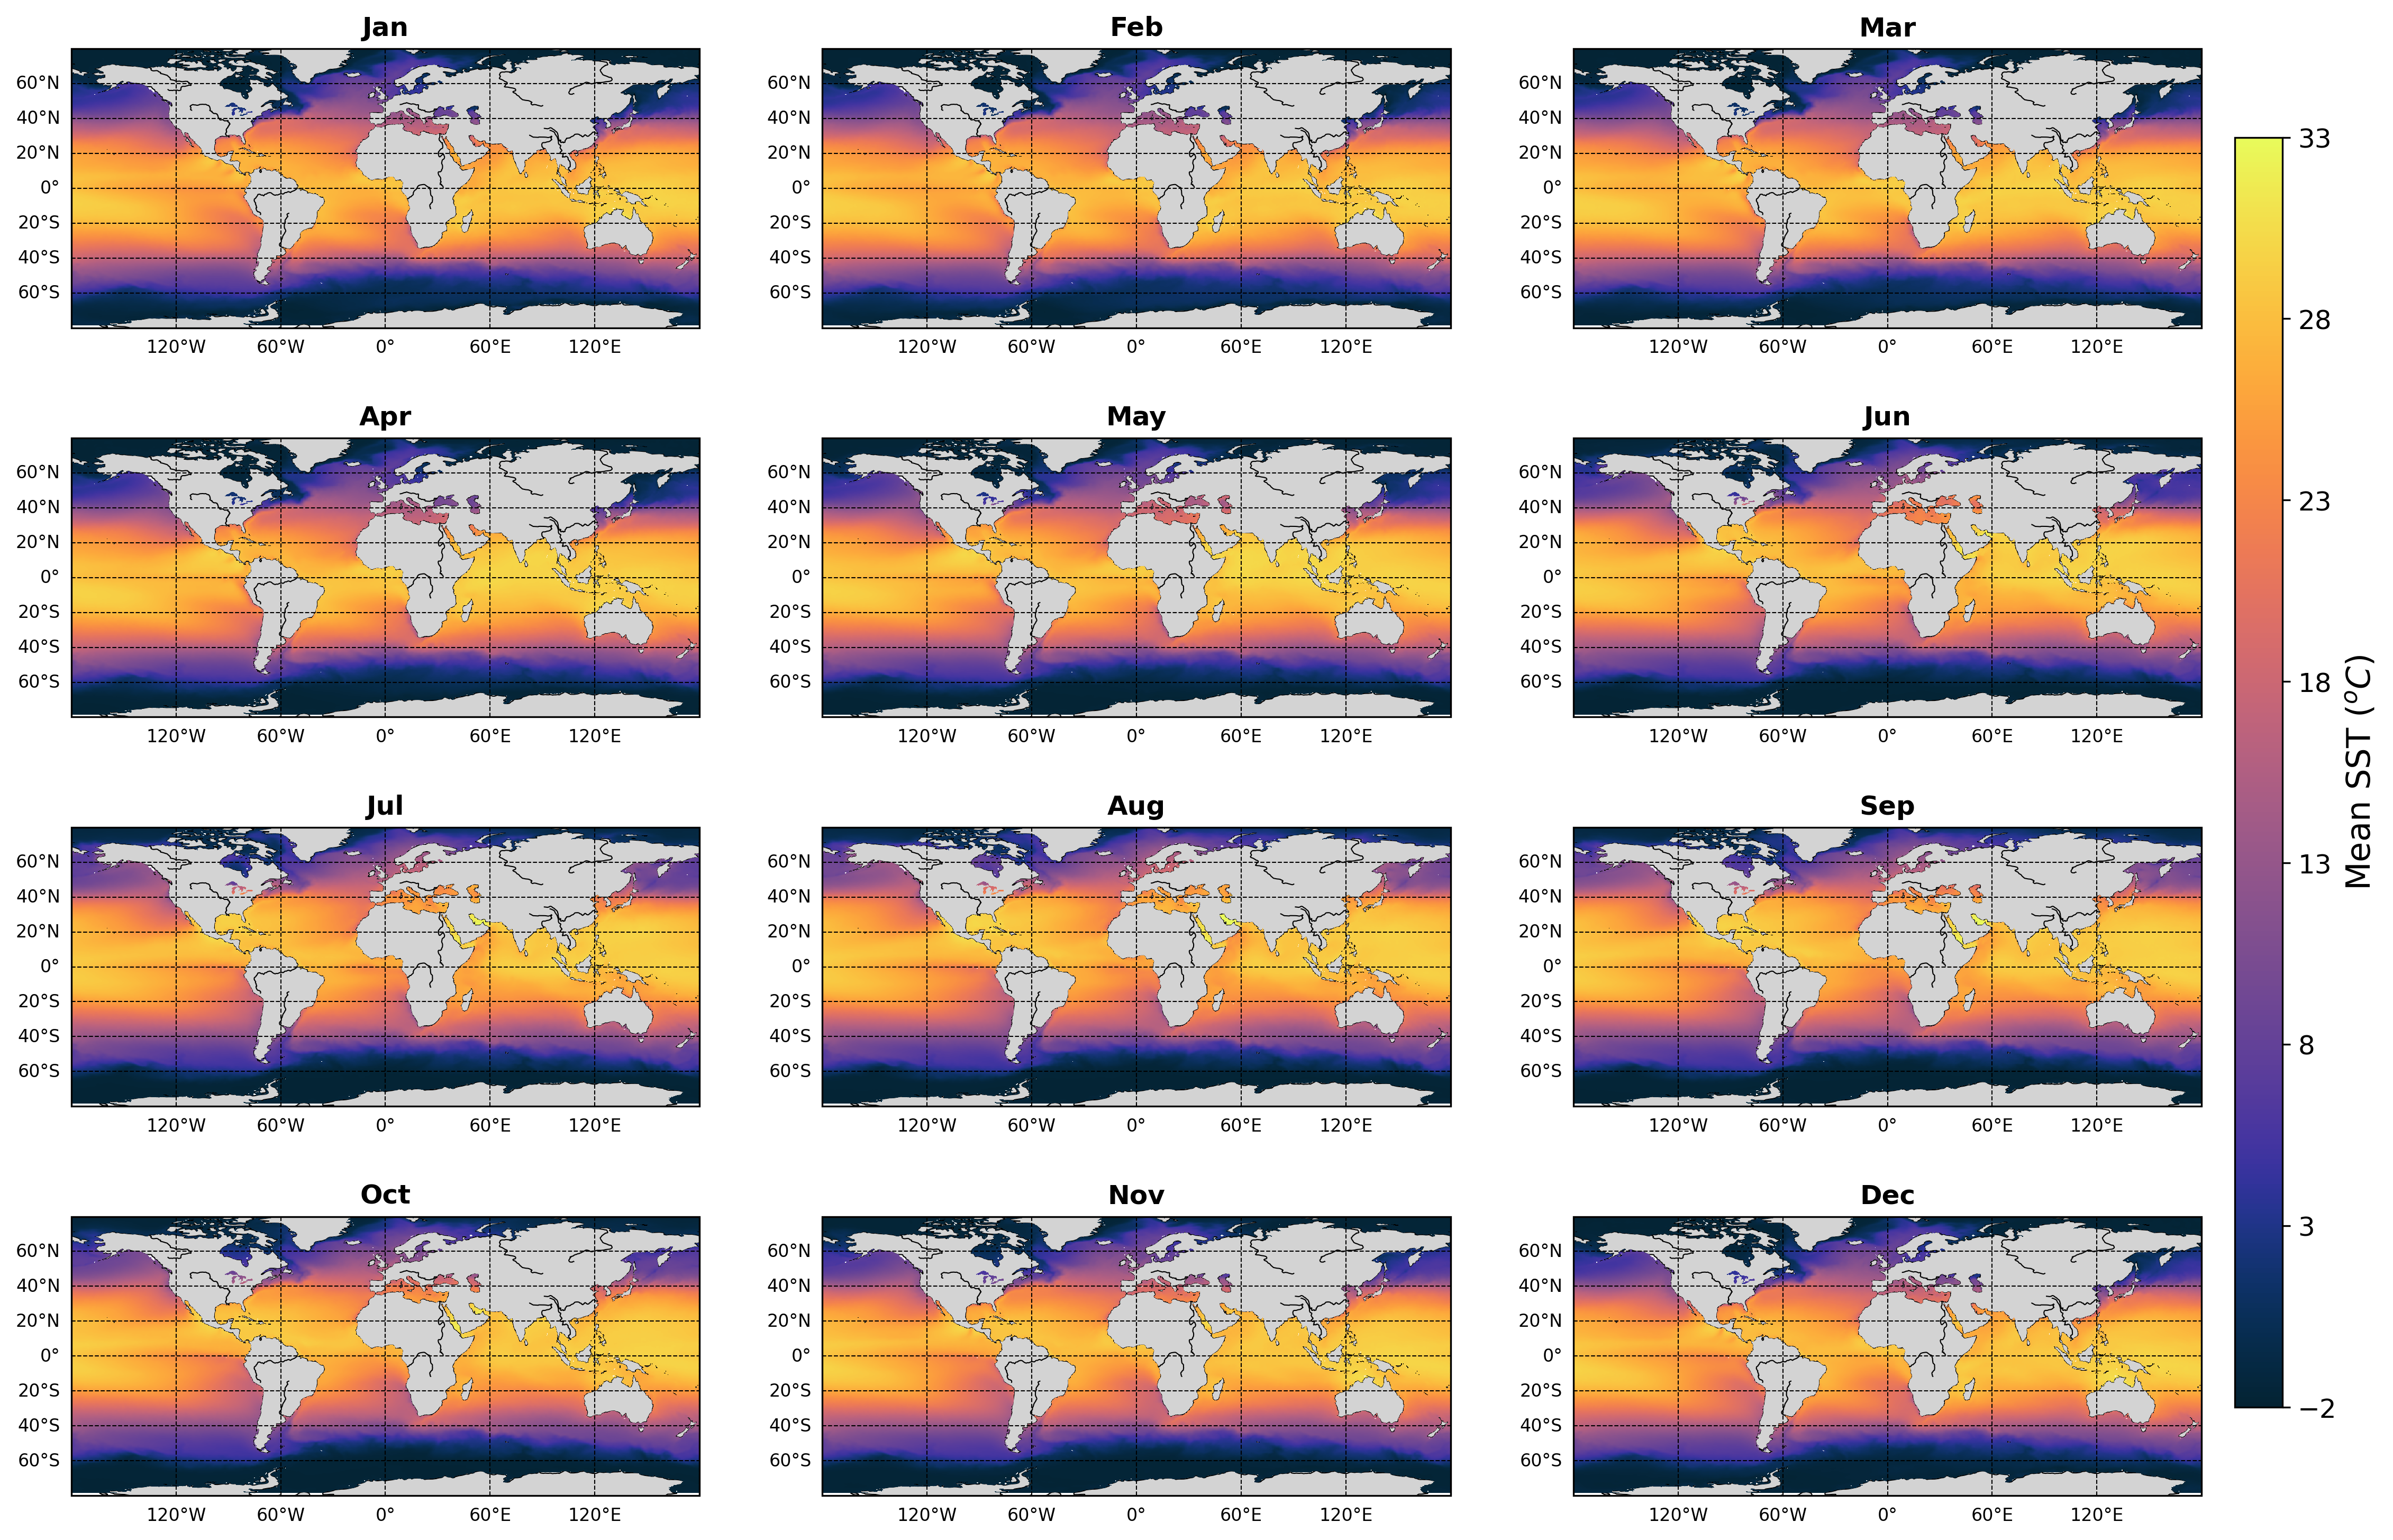

In [13]:

fig = plt.figure(figsize = (15,10), dpi = 300)

nrows, ncols = 4, 3

# extent = [-130, -122, 42, 52]
extent = [-180, 180, -80, 80]

central_lon = np.mean(extent[:2])

month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Create a list to store the plots
plots = [] 
for n in range(1, 13):
    # ax = plt.subplot(nrows, ncols, n, projection = ccrs.PlateCarree(central_longitude = central_lon))
   
    ax = fig.add_subplot(nrows, ncols, n, projection = ccrs.PlateCarree
    (central_longitude = central_lon))
    ax.set_extent(extent)
    ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey',edgecolor = 'black',linewidth=0.5)
    ax.add_feature(cp.feature.RIVERS, facecolor = 'None',edgecolor = 'black',linewidth=0.5)
    gl = ax.gridlines(draw_labels=True,linewidth=0.5, color='k',linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    # gl.xlocator = mticker.FixedLocator([-129, -127, -125, -123])
    # gl.ylocator = mticker.FixedLocator([42, 44, 46, 48, 50, 52])
    plot = sst_surf.isel(time = n-1).plot(ax=ax, x="lon", y="lat", cmap= cmocean.cm.thermal, vmin=-2, vmax=33,transform=ccrs.PlateCarree())
    ax.set_title(month_list[n-1], size=12, weight='bold' )
    cax = plot.get_figure().get_axes()[n]
    cax.remove() 
    # Add a colorbar to the third subplot in each row
    # Append each plot to the list
    plots.append(plot)

# set the spacing between subplots
plt.tight_layout()
# plt.subplots_adjust(left=0.01,
#                     bottom=0.05,
#                     right=0.90,
#                     top=0.97,
#                     wspace=0,
#                     hspace=0.25)

# Create a subplot for the colorbar
cbar_ax = fig.add_axes([0.94, 0.1, 0.02, 0.8])  # [x, y, width, height]
# Create a single colorbar for all plots
cbar = fig.colorbar(plots[0], cax=cbar_ax, orientation='vertical')
cbar.set_label('Mean SST ($^{o}C$)', size =15)
cbar.set_ticks(np.arange(-2,33.01,5))
cbar.ax.tick_params(labelsize=12)

plt.show()
fig.savefig(out_dir/f'plot_OISST_climatology_monthly_global.png', dpi = 300)
